# Titanic: Machine Learning Model


# OVERVIEW :

# General Information on the Data:


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


# Goal:

To predict whether a passenger  was survived in the sinking of the Titanic or not.
Predict 0 or 1 value for the variable.



# Source : https://www.kaggle.com/c/titanic/data

# Attributes Description :

Survival - Survival (0 = No; 1 = Yes)

PassengerId-Passengers ID

Class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - Name

Sex - Sex

Age - Age

Sibsp - Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children Aboard

Ticket - Ticket Number

Fare - Passenger Fare

Cabin - Cabin

Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



# Life Cycle :

1) Data Acquisition

2) Exploratry Data Analysis (EDA)

3) Data Visulaization

4) Data Preprocessing

5) Feature Engineering

6) Feature Scaling

7) Model Building

8) Optimaization

9) Conclusion

# Importing Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set()
from time import time


from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.tree import DecisionTreeClassifier



from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve,accuracy_score


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

# Process-1 Data Acquisition

In [2]:
#Load datain csv format
titanic=pd.read_csv('/content/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dataset have totally 11 features as an input(PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked) 

and 1 feature as output(Survived) 

(totally 12 features)

# Process-2 EDA

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Dropping the duplicate values
titanic = titanic.drop_duplicates()

In [5]:
#  explore the columns
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Shape of the data

print("Number Of Rows = %s" % titanic.shape[0])
print("Number Of Columns = %s" % titanic.shape[1])

Number Of Rows = 891
Number Of Columns = 12


In [7]:
#Using pandas to set float_format to 2 decimals after the point.
pd.options.display.float_format = '{:.2f}'.format   

In [8]:
#Numerical, Categorical and floating features
numerical_features = titanic.dtypes[titanic.dtypes == "int"].index
print("Number of Numerical features: ", len(numerical_features))

categorical_features = titanic.dtypes[titanic.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))

floating_features = titanic.dtypes[titanic.dtypes == "float"].index
print("Number of Categorical features: ", len(floating_features))

Number of Numerical features:  5
Number of Categorical features:  5
Number of Categorical features:  2


Skewness: 0.478523
Kurtosis: -1.775005


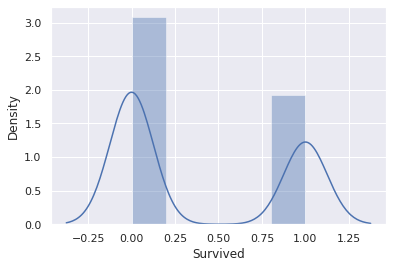

In [9]:
#Skewness and Kurtosis of the target (depndent) variable

sns.distplot(titanic['Survived']);
print("Skewness: %f" % titanic['Survived'].skew())
print("Kurtosis: %f" % titanic['Survived'].kurt())

Skewness:
    
Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric 
if it looks the same to the left and right of the center point.
The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero.
Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data 
that are skewed right.

Kurtosis:
    
Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.
Data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails,
or lack of outliers.

In [10]:
for col in numerical_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(titanic[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(titanic[col].kurt())  
         )
for col in floating_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(titanic[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(titanic[col].kurt())  
         )    

PassengerId     Skewness: 00.00     Kurtosis: -01.20
Survived        Skewness: 00.48     Kurtosis: -01.78
Pclass          Skewness: -0.63     Kurtosis: -01.28
SibSp           Skewness: 03.70     Kurtosis: 017.88
Parch           Skewness: 02.75     Kurtosis: 009.78
Age             Skewness: 00.39     Kurtosis: 000.18
Fare            Skewness: 04.79     Kurtosis: 033.40


In [11]:
#Summary of categorical features
titanic.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taylor, Mr. Elmer Zebley",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [12]:
#Summary of numerical features
titanic.describe(include=['int','float64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [13]:
#Analyzing data for Unique values in the numerical features.
for i in titanic.columns:
    if(titanic[i].dtype!=type(object)):
        print(i,':\n',titanic[i].unique(),'\n\n')

PassengerId :
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243

In [14]:
#Analyzing data for no of outliers in Numerical column:
for i in titanic.columns:
    if(titanic[i].dtype!=type(object)):
        q1=titanic[i].quantile(0.25)
        q3=titanic[i].quantile(0.75)
        IQR=q3-q1
        ub=q3+(1.5*IQR)
        lb=q1-(1.5*IQR)
        out_ub=titanic[titanic[i]>ub][i]
        out_lb=titanic[titanic[i]<lb][i]
        print("no of outliers in",i,"is",len(out_ub)+len(out_lb))

no of outliers in PassengerId is 0
no of outliers in Survived is 0
no of outliers in Pclass is 0
no of outliers in Age is 11
no of outliers in SibSp is 46
no of outliers in Parch is 213
no of outliers in Fare is 116


{'boxes': [<matplotlib.patches.PathPatch at 0x7f3e85f4fa10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3e85f60090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3e85f680d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3e85f60b10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3e85f58550>,
  <matplotlib.lines.Line2D at 0x7f3e85f58b10>]}

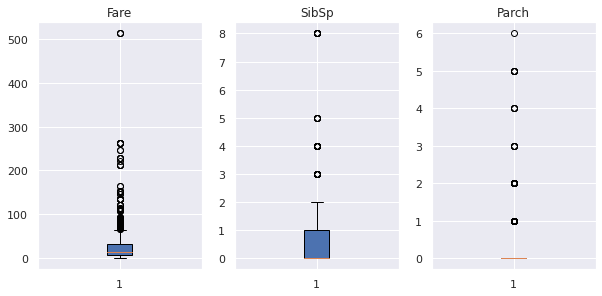

In [15]:
#ploting boxplot for all columns to check wheather the outliers are present in dataset or not. 
plt.figure(figsize=(10,10))


plt.subplot(2,3,1)
plt.title('Fare')
plt.boxplot(titanic['Fare'],patch_artist=True)


plt.subplot(2,3,2)
plt.title('SibSp')
plt.boxplot(titanic['SibSp'],patch_artist=True)

plt.subplot(2,3,3)
plt.title('Parch')
plt.boxplot(titanic['Parch'],patch_artist=True)


# Process 3 and 4 :  Data PrePreprocessing And Visualization

# PassengerID

In [16]:
#Passengerid is a unique identity of passengers 
# So drop Passengerid feature
titanic=titanic.drop(['PassengerId'],1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


# Pclass

In [17]:
# unique values in Pclass
titanic['Pclass'].unique()

array([3, 1, 2])

 Pclass id for define Ticket class. Like Business class,Economical class, etc..

1) class 3 for higher class

2) class 2 for midddel class

3) class 1 for lowwer class 

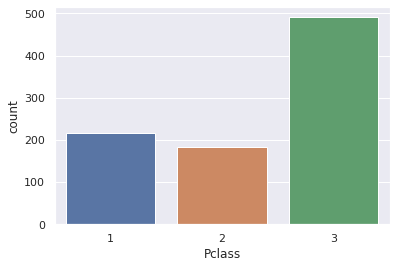

In [18]:
sns.countplot(x=titanic['Pclass'])

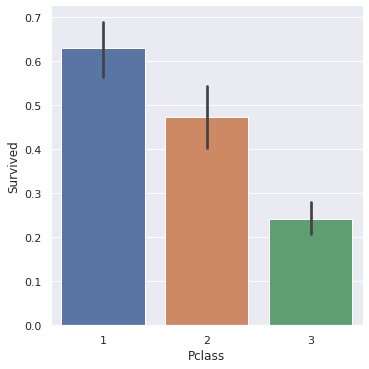

In [19]:
# we can see that highest number of passengers travelling in class 3,Lets see relation between Pclass and Survival
sns.catplot(x='Pclass',y='Survived',data=titanic,kind='bar')
#with help of Barplot, we can say that class 1 passengers mostly likely to survive

# Name

In [20]:

titanic['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [21]:
#let extract Titles of Passengers
titanic['Title']=titanic['Name'].str.extract('([A-Za-z]+)\.',)
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

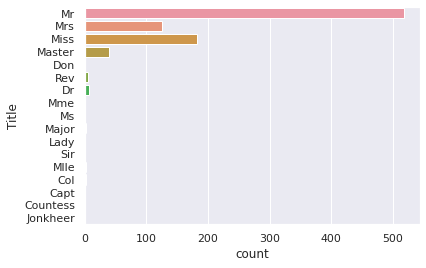

In [22]:
sns.countplot(y=titanic['Title'])

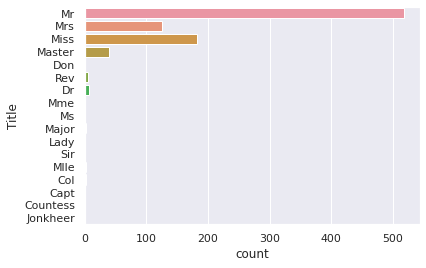

In [23]:
#above count plot showing number of title we have in our data and  We got all unique titles from names

sns.countplot(y=titanic['Title'])

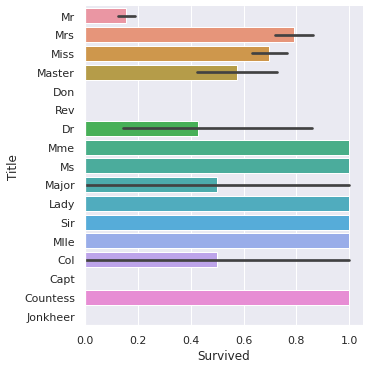

In [24]:
sns.catplot(y='Title',x='Survived',data=titanic,kind='bar')

In [25]:
# we get some meaningfull of title feature
#Drop name
titanic=titanic.drop(['Name'],1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,0,3,male,22.00,1,0,A/5 21171,7.25,NaN,S,Mr
1,1,1,female,38.00,1,0,PC 17599,71.28,C85,C,Mrs
2,1,3,female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,Miss
3,1,1,female,35.00,1,0,113803,53.10,C123,S,Mrs
4,0,3,male,35.00,0,0,373450,8.05,NaN,S,Mr


# Sex

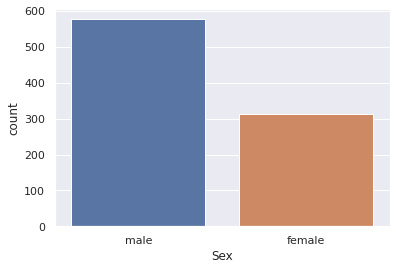

In [26]:
sns.countplot(titanic['Sex'])
#identifying male/female

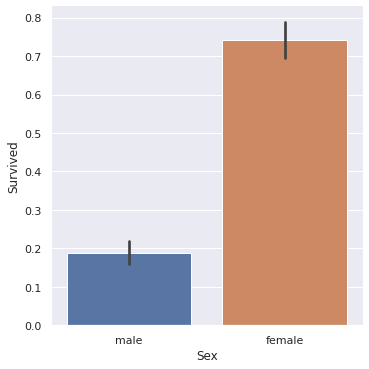

In [27]:
#identifying survival rate base on sex
sns.catplot(x='Sex',y='Survived',data=titanic,kind='bar')
#female are survived most

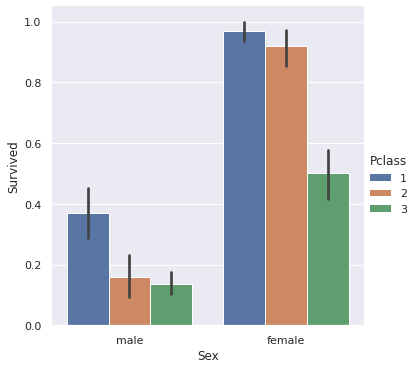

In [28]:
#survival plot base on Pclass along with gender
sns.catplot(x='Sex',y='Survived',data=titanic,kind='bar',hue='Pclass')
#relationship between Sex-Pclass-Survived

In [29]:
#covert categorical values into numeric values using mapping technique
titanic['Sex']=titanic['Sex'].map({'male':0,'female':1})


# Data Preprocessing

In [30]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [31]:
print(titanic.Pclass.unique())
print(titanic.Sex.unique())

[3 1 2]
[0 1]


In [32]:
#Age feature having some missing values so we need to process them
for i in range(0,2):
    for j in range(0,3):
        print(i,j+1)
        temp_dataset=titanic[(titanic['Sex']==i) &  (titanic['Pclass']==j+1)]['Age'].dropna()
        print(temp_dataset)
        #print(str(temp_dataset.median())+"  "+str(i)+"  "+str(j+1))
        titanic.loc[(titanic.Age.isnull()) & (titanic.Sex==i) & (titanic.Pclass==j+1),'Age']=int(temp_dataset.median())

0 1
6     54.00
23    28.00
27    19.00
30    40.00
34    28.00
       ... 
822   38.00
857   51.00
867   31.00
872   33.00
889   26.00
Name: Age, Length: 101, dtype: float64
0 2
20    35.00
21    34.00
33    66.00
70    32.00
72    21.00
       ... 
848   28.00
861   21.00
864   24.00
883   28.00
886   27.00
Name: Age, Length: 99, dtype: float64
0 3
0     22.00
4     35.00
7      2.00
12    20.00
13    39.00
       ... 
876   20.00
877   19.00
881   33.00
884   25.00
890   32.00
Name: Age, Length: 253, dtype: float64
1 1
1     38.00
3     35.00
11    58.00
52    49.00
61    38.00
       ... 
856   45.00
862   48.00
871   47.00
879   56.00
887   19.00
Name: Age, Length: 85, dtype: float64
1 2
9     14.00
15    55.00
41    27.00
43     3.00
53    29.00
       ... 
854   44.00
865   42.00
866   27.00
874   28.00
880   25.00
Name: Age, Length: 74, dtype: float64
1 3
2     26.00
8     27.00
10     4.00
14    14.00
18    31.00
       ... 
855   18.00
858   24.00
875   15.00
882   22.00
885 

In [33]:
titanic["Sex"].isnull().sum()

0

# Fare

In [34]:
#fare depend on Pclass,Sex, and age
titanic['Fare']=titanic['Fare'].fillna(titanic.loc[(titanic['Pclass']==3) & (titanic['Sex']=="male") & (titanic['Age']<65) & (titanic['Age']>55)].dropna()['Fare'].mean())

In [35]:
titanic['Fare_Band']=pd.cut(titanic['Fare'],3)
titanic['Fare_Band'].unique()

[(-0.512, 170.776], (170.776, 341.553], (341.553, 512.329]]
Categories (3, interval[float64]): [(-0.512, 170.776] < (170.776, 341.553] < (341.553, 512.329]]

In [36]:
titanic.loc[(titanic['Fare']<=170.776),'Fare']=1
titanic.loc[(titanic['Fare']>170.776) & (titanic['Fare']<=314.553),'Fare']=2
titanic.loc[(titanic['Fare']>314.553) & (titanic['Fare']<=513),'Fare']=3
titanic=titanic.drop(['Fare_Band'],1)

In [37]:
titanic['Fare'].value_counts()

1.00    871
2.00     17
3.00      3
Name: Fare, dtype: int64

# Age

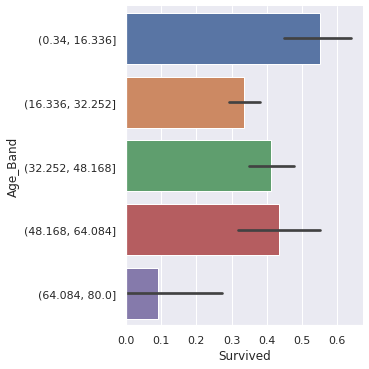

In [38]:
titanic['Age_Band']=pd.cut(titanic['Age'],5)
titanic['Age_Band'].unique()
sns.catplot(y="Age_Band",x='Survived',data=titanic,kind='bar')

### lower age passengers are more likely to survive and higger age likely to not survive

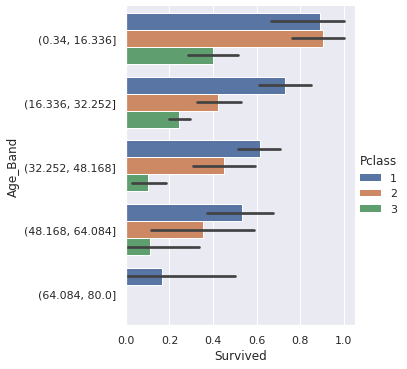

In [39]:
#relationship between Age_band,Survival,Pclass
sns.catplot(y="Age_Band",x='Survived',data=titanic,kind='bar',hue='Pclass')

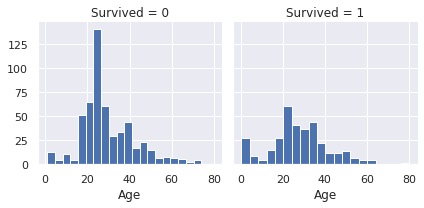

In [40]:
g = sns.FacetGrid(titanic, col='Survived')
g.map(plt.hist, 'Age', bins=20)


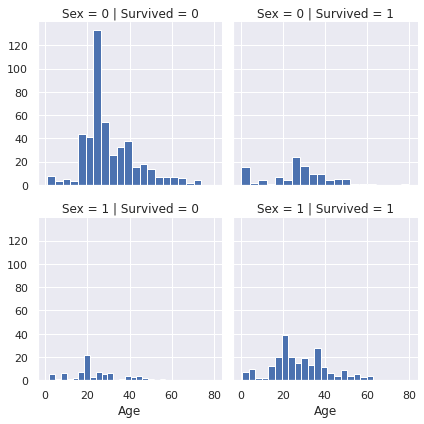

In [41]:
g = sns.FacetGrid(titanic, col='Survived',row='Sex')
g.map(plt.hist, 'Age', bins=20)

#here Sex=0 represents Male and Sex=1 represents Female


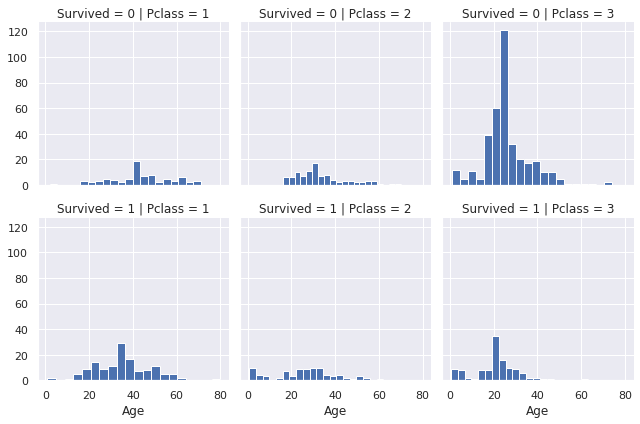

In [42]:
#relation between Survived and Pclass individually

g = sns.FacetGrid(titanic, row='Survived',col='Pclass')
g.map(plt.hist, 'Age', bins=20)

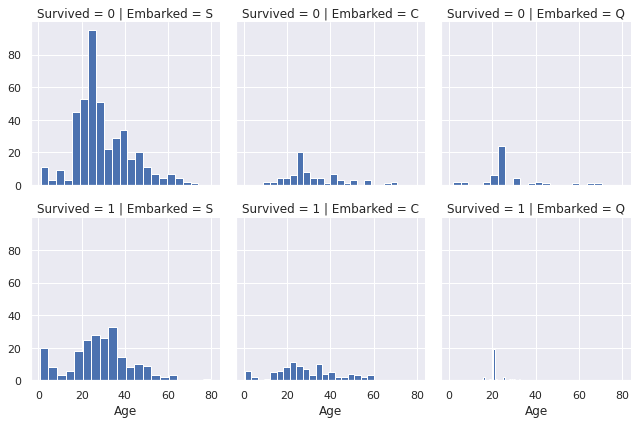

In [43]:
#relation between survived and Embarked indvidually

g = sns.FacetGrid(titanic, row='Survived',col='Embarked')
g.map(plt.hist, 'Age', bins=20)

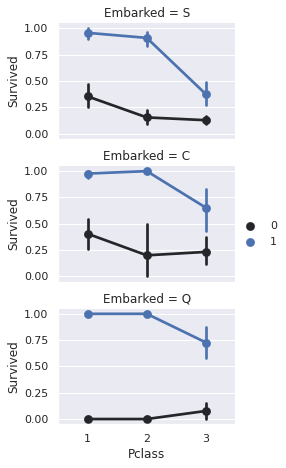

In [44]:
grid = sns.FacetGrid(titanic, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

In [45]:
titanic=titanic.drop(['Age_Band'],1)

In [46]:
titanic.loc[(titanic['Age']<=16.136),'Age']=1
titanic.loc[(titanic['Age']>16.136) & (titanic['Age']<=32.102),'Age']=2
titanic.loc[(titanic['Age']>32.102) & (titanic['Age']<=48.068),'Age']=3
titanic.loc[(titanic['Age']>48.068) & (titanic['Age']<=64.034),'Age']=4
titanic.loc[(titanic['Age']>64.034) & (titanic['Age']<=80.),'Age']=5
titanic['Age'].unique()

array([2., 3., 4., 1., 5.])

# Process 5: Feature Engineering  Along with Data Visualization

# SibSp/Parch

Sibsb:Number of Sibling
    
Parch:Number of Parents

using this features we can create new fature Family

In [47]:
titanic['FamilySize']=titanic['SibSp']+titanic['Parch']+1
titanic=titanic.drop(['SibSp','Parch'],1)

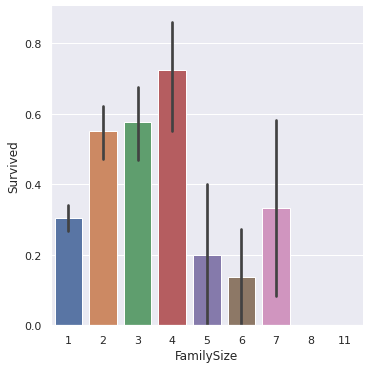

In [48]:
sns.catplot(x='FamilySize',y='Survived',data=titanic,kind='bar')

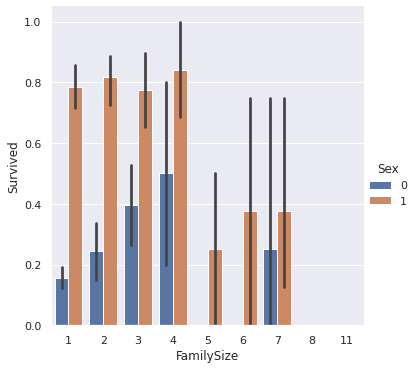

In [49]:
#Survival probility as per familysize
sns.catplot(x='FamilySize',y='Survived',data=titanic,kind='bar',hue='Sex')

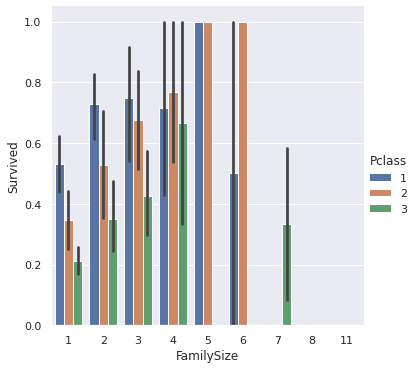

In [50]:
sns.catplot(x='FamilySize',y='Survived',data=titanic,kind='bar',hue='Pclass')

# FEATURE SELECTION

In [51]:
#Ticket  does not matter to Survivel of Passengers 
#let drop it
titanic=titanic.drop(['Ticket'],1)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,2.00,1.00,NaN,S,Mr,2
1,1,1,1,3.00,1.00,C85,C,Mrs,2
2,1,3,1,2.00,1.00,NaN,S,Miss,1
3,1,1,1,3.00,1.00,C123,S,Mrs,2
4,0,3,0,3.00,1.00,NaN,S,Mr,1


# Cabin

In [52]:
#This feature is to hard to find is it usefull for use or not? So, Let's do some oprations and find the meaningfull data

In [53]:
titanic['Cabin'].isnull().sum()

687

In [54]:
titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [55]:
#Filling missing datas as  "Z"
titanic['Cabin']=titanic['Cabin'].fillna('Z')

#take first character 
titanic['Cabin']=titanic['Cabin'].astype(str).str[0]

In [56]:
titanic.Cabin.unique()

array(['Z', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

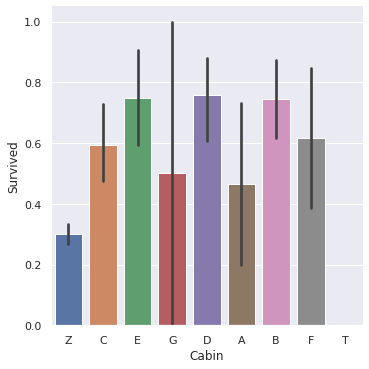

In [57]:
#survival based on Cabin
sns.catplot(x='Cabin',y='Survived',data=titanic,kind='bar')

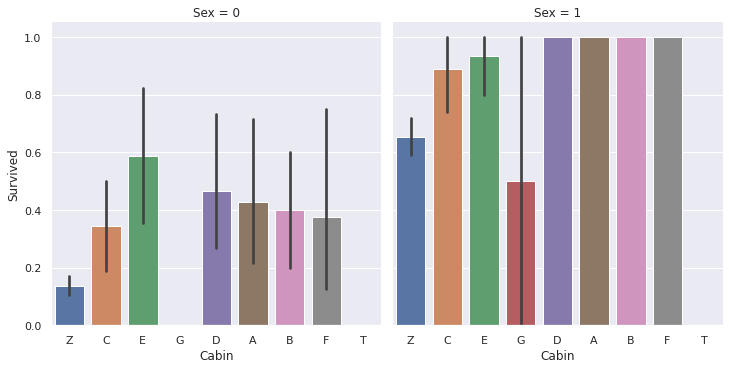

In [58]:
#survival based on Cabin and Sex
sns.catplot(x='Cabin',y='Survived',data=titanic,col='Sex',kind='bar')

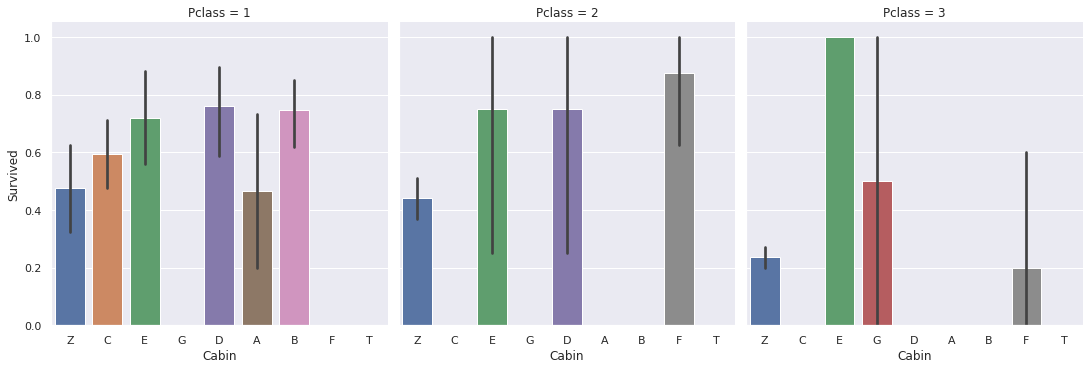

In [59]:
#survival based on Cabin  and Pclass
sns.catplot(x='Cabin',y='Survived',data=titanic,col='Pclass',kind='bar')

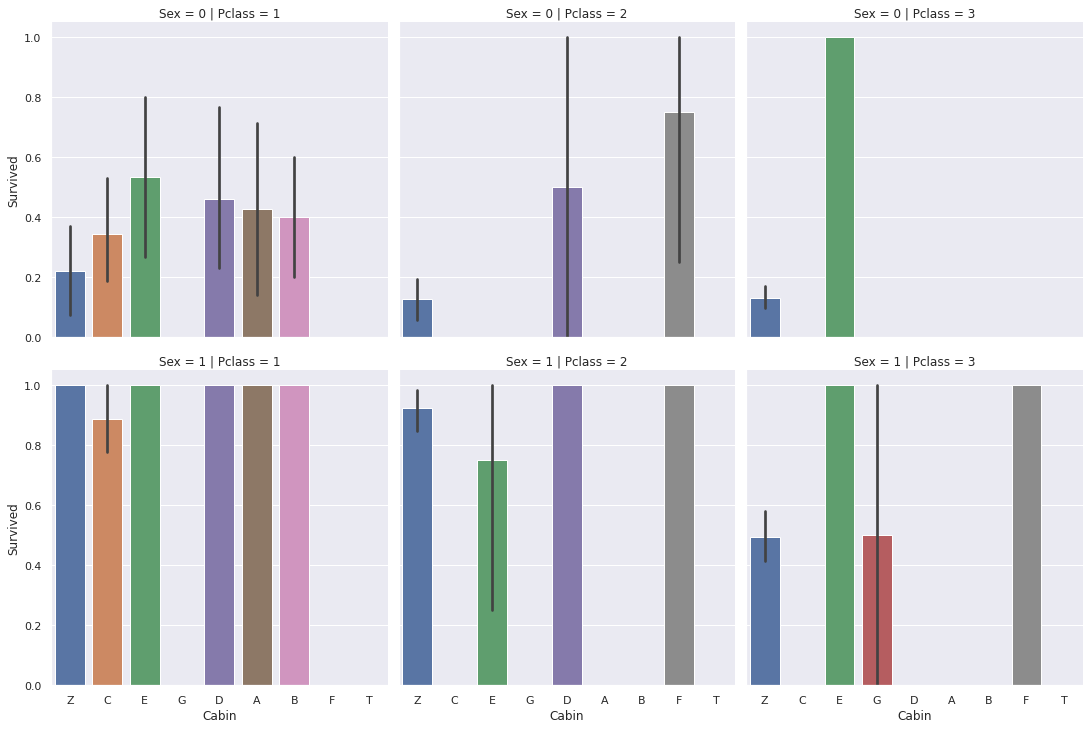

In [60]:
#survival based on Cabin, Pclass and Sex
sns.catplot(x='Cabin',y='Survived',data=titanic,col='Pclass',row='Sex',kind='bar')

In [61]:
#after preprocessing the Cabin feature we having lot of null values,and it hard to handle them
#So, dropping would be a vital solution


In [62]:
titanic=titanic.drop(['Cabin'],1)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,2.00,1.00,S,Mr,2
1,1,1,1,3.00,1.00,C,Mrs,2
2,1,3,1,2.00,1.00,S,Miss,1
3,1,1,1,3.00,1.00,S,Mrs,2
4,0,3,0,3.00,1.00,S,Mr,1


# Embarked

In [63]:
print(titanic['Embarked'].unique())
print(titanic['Embarked'].isnull().sum())

['S' 'C' 'Q' nan]
2


In [64]:
# We having only  2 missing values, so let's replace it with most frequent value

titanic['Embarked']=titanic['Embarked'].fillna(titanic['Embarked'].value_counts().index[0]) 
print(titanic['Embarked'].unique())

['S' 'C' 'Q']


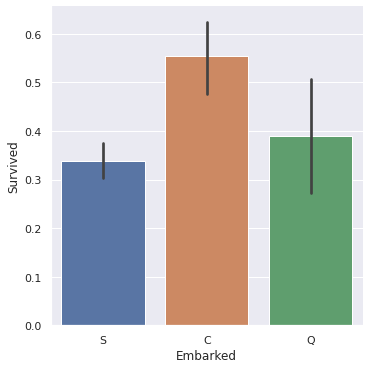

In [65]:
#relation betweeen Embarked and Survived
sns.catplot(x='Embarked',y='Survived',data=titanic,kind='bar')

# Statistical Analysis On Numerical Columns

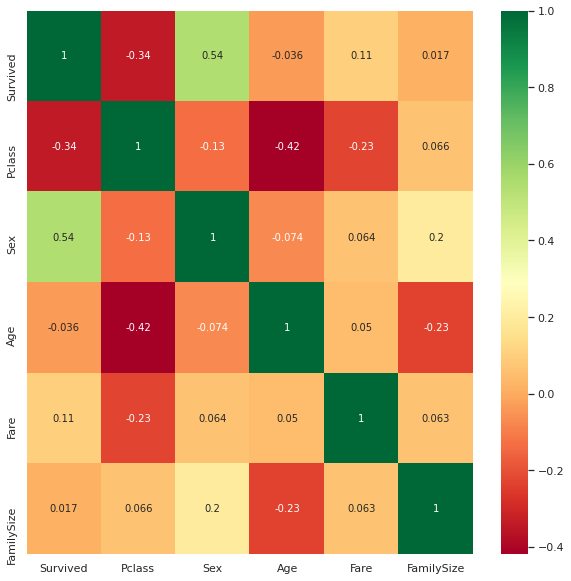

In [66]:
# Correlation between variable using correlation plot.
plt.figure(figsize=(10,10))
sns.heatmap(titanic.corr(), annot=True,cmap="RdYlGn")


# Label Encoding

In [67]:
titanic=pd.get_dummies(columns=['Pclass','Sex','Embarked','Title','Age','Fare'],data=titanic)
titanic.head()

,Survived,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,Title_Capt,Title_Col,Title_Countess,Title_Don,Title_Dr,Title_Jonkheer,Title_Lady,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Age_1.0,Age_2.0,Age_3.0,Age_4.0,Age_5.0,Fare_1.0,Fare_2.0,Fare_3.0
0,0,2,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
1,1,2,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0


# Process 6: Feature Scaling  Standardization Of Data 

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
from sklearn.model_selection import train_test_split


X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20,random_state =123)
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_train

array([[ 0.07728104,  1.81360322, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       ...,
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853]])

In [69]:
X_test=scaler.transform(X_test)
X_test

array([[ 0.70255492, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284,  1.81360322, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       ...,
       [ 0.70255492, -0.55138852,  1.94384246, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852, -0.51444498, ...,  0.16104844,
        -0.1466997 , -0.06504853],
       [-0.54799284, -0.55138852,  1.94384246, ...,  0.16104844,
        -0.1466997 , -0.06504853]])

# Process 7: Model Building

In [70]:
from sklearn.model_selection import train_test_split

#assign train and test datas
X = titanic.drop(['Survived'],axis=1)
y = titanic['Survived']

#split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.20,random_state =123)

#apply Logistic Regression model 
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.01)
lr.fit(X_train,y_train)
print('Logistic Regression Train Score :',lr.score(X_train,y_train))
print('Logistic Regression Test Score :',lr.score(X_test,y_test))

Logistic Regression Train Score : 0.797752808988764
Logistic Regression Test Score : 0.8324022346368715


In [71]:
#predict the test data
y_predict_lr=lr.predict(X_test)

print('y Predict: ',y_predict_lr)

y Predict:  [1 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0]


[[103  11]
 [ 19  46]]


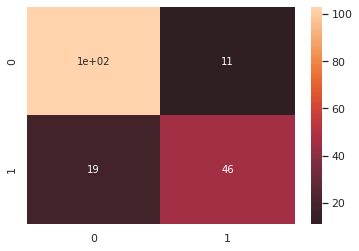

In [72]:

from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,y_predict_lr)
print(cm_lr)
sns.heatmap(cm_lr,center=True,annot=True)

In [73]:
#accuracy score
from sklearn.metrics import accuracy_score
acc_lr=accuracy_score(y_test,y_predict_lr)
print(acc_lr)

0.8324022346368715


In [74]:
#classification report
from sklearn.metrics import classification_report
cr_lr=classification_report(y_test,y_predict_lr)
print(cr_lr)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       114
           1       0.81      0.71      0.75        65

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



LR_tpr:  [0.         0.09649123 1.        ]
LR_fpr:  [0.         0.70769231 1.        ]
threshold:  [2 1 0]


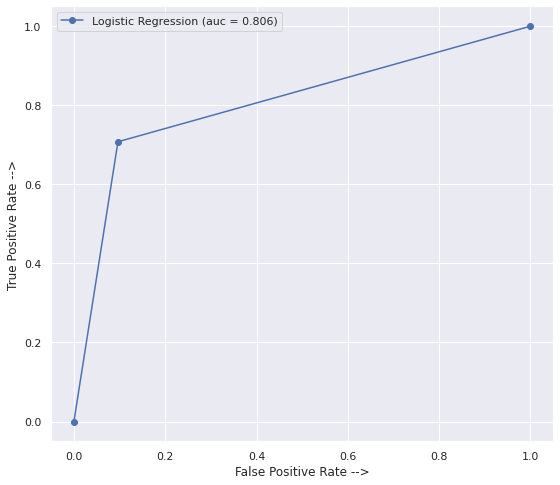

In [75]:
from sklearn.metrics import roc_curve,auc
lr_tpr,lr_fpr,threshold=roc_curve(y_test,y_predict_lr)
lr_auc = auc(lr_tpr, lr_fpr)
print('LR_tpr: ',lr_tpr)
print('LR_fpr: ',lr_fpr)
print('threshold: ',threshold)

#ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 8))
plt.plot(lr_tpr, lr_fpr, marker='o', label='Logistic Regression (auc = %0.3f)' % lr_auc)
plt.ylabel('True Positive Rate -->')
plt.xlabel('False Positive Rate -->')

plt.legend()

plt.show()

# Support Vector Machine - Model building

In [76]:
#Support vector machine
from sklearn.svm import SVC
svc=SVC(C=1,kernel='rbf')
svc.fit(X_train,y_train)
print('Logistic Regression Train Score :',svc.score(X_train,y_train))
print('Logistic Regression Test Score :',svc.score(X_test,y_test))

Logistic Regression Train Score : 0.8286516853932584
Logistic Regression Test Score : 0.8659217877094972


In [77]:
y_predict_svc=svc.predict(X_test)
print(y_predict_svc)

[1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0]


[[105   9]
 [ 15  50]]


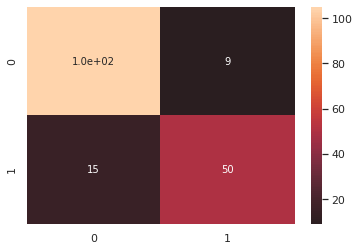

In [78]:
from sklearn.metrics import  confusion_matrix
cm_svc=confusion_matrix(y_test,y_predict_svc)
print(cm_svc)
sns.heatmap(cm_svc,center=True,annot=True)

In [79]:
from sklearn.metrics import accuracy_score
acc_svm=accuracy_score(y_test,y_predict_svc)
print(acc_svm)

0.8659217877094972


In [80]:
from sklearn.metrics import classification_report
cr_svm=classification_report(y_test,y_predict_svc)
print(cr_svm)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       114
           1       0.85      0.77      0.81        65

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.86      0.87      0.86       179



svm_tpr [0.         0.07894737 1.        ]
svm_fpr [0.         0.76923077 1.        ]
threshold [2 1 0]


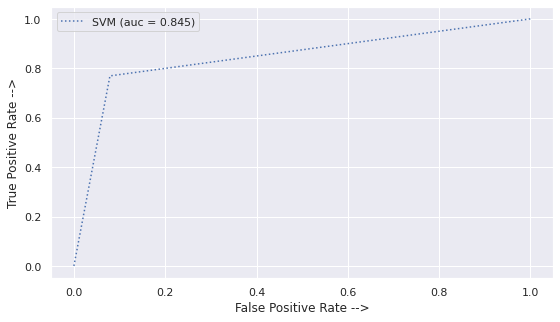

In [81]:
from sklearn.metrics import roc_curve,auc
svm_tpr,svm_fpr,threshold=roc_curve(y_test,y_predict_svc)
svm_auc=auc(svm_tpr,svm_fpr)
print('svm_tpr',svm_tpr)
print('svm_fpr',svm_fpr)
print('threshold',threshold)


# ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(svm_tpr, svm_fpr, linestyle=':', label='SVM (auc = %0.3f)' % svm_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# KNeighborsClassifier - Model building

In [82]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=13,metric = 'minkowski', p = 1)
knn.fit(X_train,y_train)
print('KNN Train Score :',knn.score(X_train,y_train))
print('KNN Test Score :',knn.score(X_test,y_test))

KNN Train Score : 0.8286516853932584
KNN Test Score : 0.8715083798882681


In [83]:
y_predict_knn=knn.predict(X_test)
print(y_predict_knn)

[0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0]


[[107   7]
 [ 16  49]]


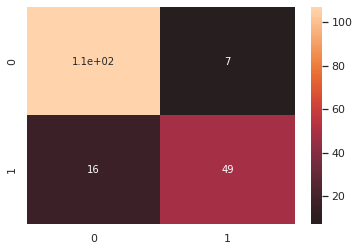

In [84]:
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test,y_predict_knn)
print(cm_knn)
sns.heatmap(cm_knn,center=True,annot=True)

In [85]:
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_test,y_predict_knn)
print(acc_knn)

0.8715083798882681


In [86]:
from sklearn.metrics import classification_report
cr_knn=classification_report(y_test,y_predict_knn)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       114
           1       0.88      0.75      0.81        65

    accuracy                           0.87       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.87      0.87      0.87       179



True Positive Rate [0.         0.06140351 1.        ]
False Positive Rate [0.         0.75384615 1.        ]
threshold [2 1 0]


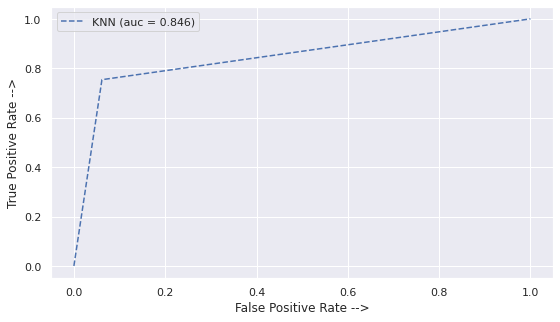

In [87]:
from sklearn.metrics import roc_curve,auc
knn_tpr,knn_fpr,threshold=roc_curve(y_test,y_predict_knn)
print('True Positive Rate',knn_tpr)
print('False Positive Rate',knn_fpr)
print('threshold',threshold)

knn_auc=auc(knn_tpr,knn_fpr)

#ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(knn_tpr, knn_fpr, linestyle='--', label='KNN (auc = %0.3f)' %knn_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# DecisionTreeClassifier - Model Building

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=7)
dt.fit(X_train,y_train)
print(' DecisionTree Train Score :',dt.score(X_train,y_train))
print(' DecisionTree Test Score :',dt.score(X_test,y_test))

 DecisionTree Train Score : 0.851123595505618
 DecisionTree Test Score : 0.8324022346368715


In [89]:
y_predict_dt=dt.predict(X_test)
print(y_predict_dt)

[0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0]


In [90]:
from sklearn.metrics import accuracy_score
acc_dt=accuracy_score(y_test,y_predict_dt)
print(acc_dt)

0.8324022346368715


[[101  13]
 [ 17  48]]


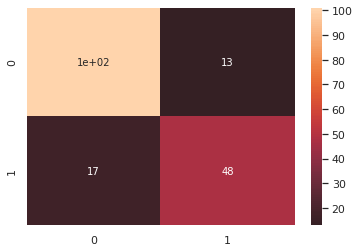

In [91]:
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_predict_dt)
print(cm_dt)
sns.heatmap(cm_dt,center=True,annot=True)

In [92]:
from sklearn.metrics import classification_report
cr_dt=classification_report(y_test,y_predict_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       114
           1       0.79      0.74      0.76        65

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



True Positive Rate [0.         0.11403509 1.        ]
False Positive Rate [0.         0.73846154 1.        ]
threshold [2 1 0]


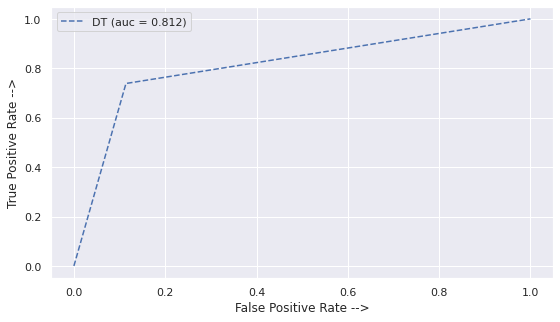

In [93]:
from sklearn.metrics import roc_curve,auc
dt_tpr,dt_fpr,threshold=roc_curve(y_test,y_predict_dt)
print('True Positive Rate',dt_tpr)
print('False Positive Rate',dt_fpr)
print('threshold',threshold)

dt_auc=auc(dt_tpr,dt_fpr)

#Draw ROC Curve && AUC [Area Under The Curve]
plt.figure(figsize=(9, 5))
plt.plot(dt_tpr, dt_fpr, linestyle='--', label='DT (auc = %0.3f)' %dt_auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

#RandomForestClassifier - Model Building


In [94]:
from sklearn.ensemble import RandomForestClassifier 
rf=RandomForestClassifier(criterion = 'entropy',max_depth=6,n_estimators=9)
rf.fit(X_train,y_train)
print('Random Force Train Score :',rf.score(X_train,y_train))
print('Random Force Test Score :',rf.score(X_test,y_test))


Random Force Train Score : 0.8370786516853933
Random Force Test Score : 0.8659217877094972


In [95]:
y_pred_rf=rf.predict(X_test)
print('y Pred',y_pred_rf)

y Pred [1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0]


[[103  11]
 [ 13  52]]


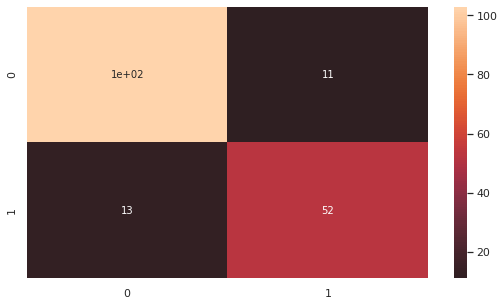

In [96]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [97]:
from sklearn.metrics import accuracy_score
acc_rf=accuracy_score(y_test,y_pred_rf)
print('Accuracy Score',acc_rf)

Accuracy Score 0.8659217877094972


In [98]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90       114
           1       0.83      0.80      0.81        65

    accuracy                           0.87       179
   macro avg       0.86      0.85      0.85       179
weighted avg       0.87      0.87      0.87       179



rf_tpr Value  :  [0.         0.09649123 1.        ]
rf_fpr Value  :  [0.  0.8 1. ]
thresholds Value  :  [2 1 0]


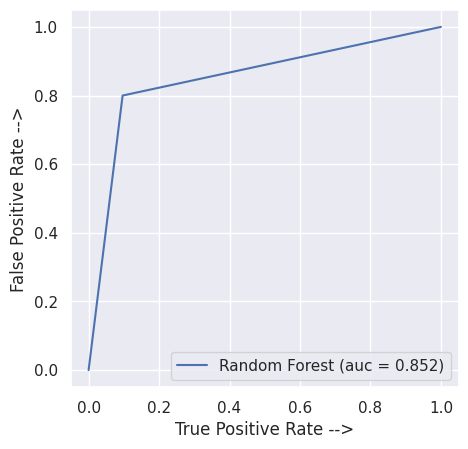

In [99]:
from sklearn.metrics import roc_curve,auc
rf_tpr,rf_fpr,threshold=roc_curve(y_test,y_pred_rf)
rf_auc=auc(rf_tpr,rf_fpr)
print('rf_tpr Value  : ', rf_tpr)
print('rf_fpr Value  : ', rf_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Random Forest (auc = %0.3f)' % rf_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

#XGBClassifier - Model Building

In [100]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print('XGB Train Score :',xgb.score(X_train,y_train))
print('XGB Test Score :',xgb.score(X_test,y_test))

XGB Train Score : 0.8370786516853933
XGB Test Score : 0.8659217877094972


In [101]:
y_pred_xgb=xgb.predict(X_test)
print('Y Pred',y_pred_xgb)

Y Pred [1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1
 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0]


[[101  13]
 [ 11  54]]


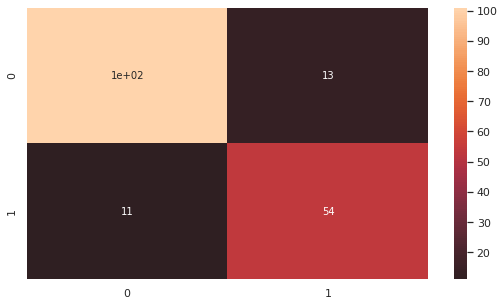

In [102]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_xgb)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)
plt.show()

In [103]:
from sklearn.metrics import accuracy_score
acc_xgb=accuracy_score(y_test,y_pred_xgb)
print('Accuracy Score',acc_xgb)

Accuracy Score 0.8659217877094972


In [104]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_xgb)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       114
           1       0.81      0.83      0.82        65

    accuracy                           0.87       179
   macro avg       0.85      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



xgb_tpr Value  :  [0.         0.11403509 1.        ]
xgb_fpr Value  :  [0.         0.83076923 1.        ]
thresholds Value  :  [2 1 0]


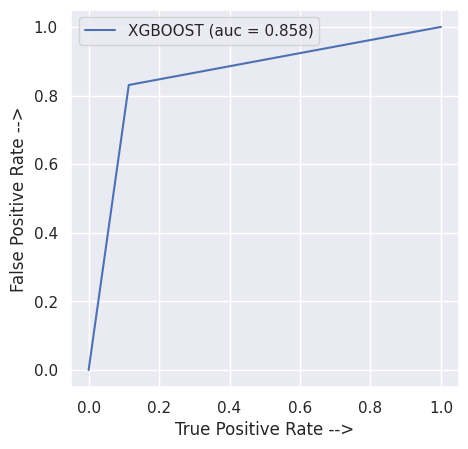

In [105]:
from sklearn.metrics import roc_curve,auc
xgb_tpr,xgb_fpr,threshold=roc_curve(y_test,y_pred_xgb)
xgb_auc=auc(xgb_tpr,xgb_fpr)
print('xgb_tpr Value  : ', xgb_tpr)
print('xgb_fpr Value  : ', xgb_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(xgb_tpr, xgb_fpr, linestyle='-', label='XGBOOST (auc = %0.3f)' % xgb_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

#Bernoulli Navie Bayes - Model Building

In [106]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(X_train,y_train)
print('Naive Bayse Train Score',nb.score(X_train,y_train))
print('Naive Bayse Test Score',nb.score(X_test,y_test))

Naive Bayse Train Score 0.7949438202247191
Naive Bayse Test Score 0.8156424581005587


In [107]:

y_pred_nb = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)
y_pred_prob2=y_pred_prob.astype(int)
print('y Test' ,y_test)
print('Predicted Value for BernoulliNBModel is : ' , y_pred_nb)
print('Prediction Probabilities Value for BernoulliNBModel is : \n' , y_pred_prob2)


y Test 172    1
524    0
452    0
170    0
620    0
      ..
388    0
338    1
827    1
773    0
221    0
Name: Survived, Length: 179, dtype: int64
Predicted Value for BernoulliNBModel is :  [1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0
 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0]
Prediction Probabilities Value for BernoulliNBModel is : 
 [[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 

[[94 20]
 [13 52]]


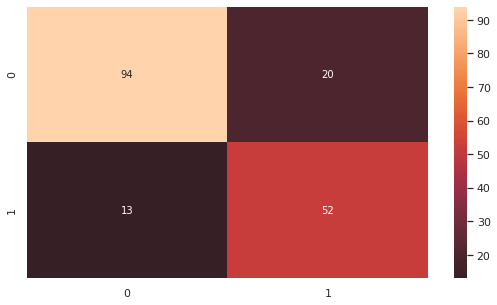

In [108]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_nb)
print(cm)
plt.figure(figsize=(9,5))
sns.heatmap(cm,center=True,annot=True)

In [109]:
from sklearn.metrics import accuracy_score
acc_nb=accuracy_score(y_test,y_pred_nb)
print(acc_nb)

0.8156424581005587


In [110]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred_nb)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       114
           1       0.72      0.80      0.76        65

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



nb_tpr Value  :  [0.        0.1754386 1.       ]
nb_fpr Value  :  [0.  0.8 1. ]
thresholds Value  :  [2 1 0]


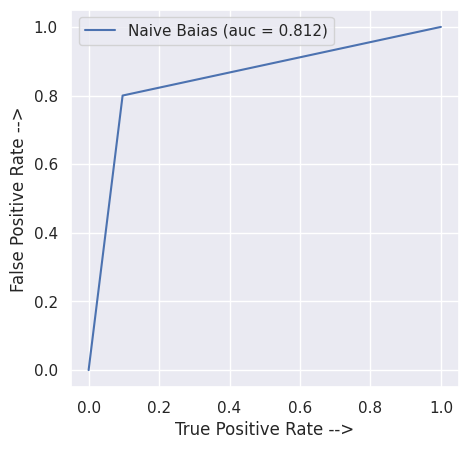

In [111]:
from sklearn.metrics import roc_curve,auc
nb_tpr,nb_fpr,threshold=roc_curve(y_test,y_pred_nb)
nb_auc=auc(nb_tpr,nb_fpr)
print('nb_tpr Value  : ', nb_tpr)
print('nb_fpr Value  : ', nb_fpr)
print('thresholds Value  : ', threshold)

#Draw ROC Curve && AUC [Area Under The Curve]

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(rf_tpr, rf_fpr, linestyle='-', label='Naive Baias (auc = %0.3f)' % nb_auc)

plt.xlabel('True Positive Rate -->')
plt.ylabel('False Positive Rate -->')

plt.legend()
plt.show()

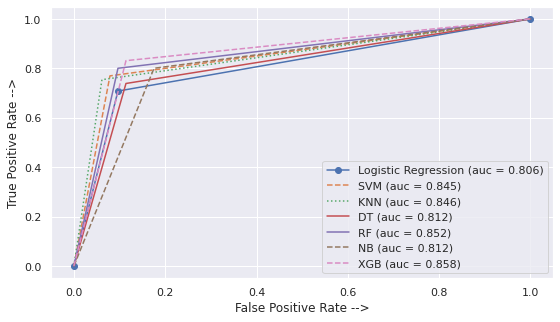

In [112]:
from sklearn.metrics import roc_curve, auc

LR_tpr,LR_fpr,threshold=roc_curve(y_test,y_predict_lr)
LR_auc = auc(lr_tpr, lr_fpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_predict_svc)
auc_svm = auc(svm_fpr, svm_tpr)

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_predict_knn)
auc_knn = auc(knn_fpr, knn_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_predict_dt)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rf = auc(rf_fpr, rf_tpr)


nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_nb = auc(nb_fpr, nb_tpr)

xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

plt.figure(figsize=(9, 5))
plt.plot(LR_tpr, LR_fpr, marker='o', label='Logistic Regression (auc = %0.3f)' % LR_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle=':', label='KNN (auc = %0.3f)' % auc_knn)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DT (auc = %0.3f)' % auc_dt)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='RF (auc = %0.3f)' % auc_rf)
plt.plot(nb_fpr, nb_tpr, linestyle='--', label='NB (auc = %0.3f)' % auc_nb)
plt.plot(xgb_fpr, xgb_tpr, linestyle='--', label='XGB (auc = %0.3f)' % auc_xgb)



plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

# Process 8: Optimization Using Grid Search CV

In [113]:
#KNN ,SVM, RF  are almost the same for optimization  so lets choose best model among them and
#apply optimization to all

In [114]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
n_neighbors = range(1, 31)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.834648 using {'metric': 'manhattan', 'n_neighbors': 23, 'weights': 'uniform'}
0.773275 (0.055580) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.773275 (0.055580) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.784515 (0.047835) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}
0.789738 (0.048905) with: {'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'distance'}
0.798722 (0.044366) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.790104 (0.045270) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.812206 (0.039053) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}
0.812555 (0.041474) with: {'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}
0.817070 (0.043724) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.808456 (0.044781) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.816696 

In [115]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
 

Best: 0.833895 using {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.824931 (0.036632) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.826034 (0.040164) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.706696 (0.049006) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.829039 (0.036929) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.830524 (0.035795) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.705947 (0.048115) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.831273 (0.033614) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.833895 (0.036000) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.734016 (0.043376) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.824166 (0.037963) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.817428 (0.039668) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.758702 (0.045899) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.621398 (0.008115) with: {'C': 0.01, 'gamma': 'scale',

In [116]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.815568 using {'max_features': 'log2', 'n_estimators': 1000}
0.811082 (0.035915) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.809954 (0.038873) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.812206 (0.038728) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.807703 (0.038869) with: {'max_features': 'log2', 'n_estimators': 10}
0.812193 (0.038007) with: {'max_features': 'log2', 'n_estimators': 100}
0.815568 (0.041027) with: {'max_features': 'log2', 'n_estimators': 1000}


In [117]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Best: 0.830129 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.827890 (0.036677) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.827141 (0.036940) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.827890 (0.036677) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.827141 (0.037617) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.827516 (0.036811) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.826767 (0.037178) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.830129 (0.038099) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.830129 (0.038099) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.827882 (0.038395) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.824157 (0.042096) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.824157 (0.042096) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.821157 (0.043271) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.805077 (0.037243) wit

# Conclusion:

# From above processing techqunies we can say that K Nearest Neighbour is the best model for Titanic Dataset.